## Excavator Activity Analysis 
----
<font size = 4 > This repository is containing data analysis of sensor node attached to an excavator for activity classification. </font>

----

### Data
<font size = 4 >  Data contains sensor data from 3 different sensors attached to the excavator. Sensors include;  </font> 

*  <a href="https://www.sparkfun.com/products/15335"> ICM-20948 </a> IMU for built-in logging of:
    * 3-axis Accelerometer
    * 3-axis Gyroscope
    * 3-axis Magnetometer
 
* <a href = "https://www.sparkfun.com/products/15005"> NEO-M9N GPS Module </a> is a 92-channel u-blox M9 engine GNSS receiver, with ~1.5 meter accuracy
* <a href =  "https://www.sparkfun.com/products/15440"> BME280 </a> atmospheric sensor breakout is an easy way to measure barometric pressure, humidity, and temperature readings.

* On-board RTC,  so that all data can be time stamped.

<font size = 4> All sensors are connected to the <a href="https://www.sparkfun.com/products/16832"> The SparkFun OpenLog Artemis </a>board, open source data logger,  via I<sup>2</sup>C</font> bus.

<font size=4>  Collected data is in the data folder. As an initial data collection setup, two sensor nodes are arranged. </font>
* A node with all sensors attached to the excavator
* A node without GPS sensor.

<font size=4> The sensor setup is depicted in the picture below.</font>
<!-- 
Add image of the sensor setup here.
-->

<img src=./data/img/sensor-setup.png width=600 height=500>

There is also a video of the data collection process and link to the video will be added here.

## Import Required Libraries for data analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Read the data from the txt file.

In [3]:
### Read data
data_with_gps = pd.read_csv("data/data-gps-included-01.TXT")
data_with_gps_2 = pd.read_csv("data/data-gps-included-02.TXT")
data_no_gps = pd.read_csv("data/data-no-gps-01.TXT")
data_no_gps_2 = pd.read_csv("data/data-no-gps-02.TXT")
### Concatenate data
data_with_gps = pd.concat([data_with_gps,data_with_gps_2])
data_no_gps = pd.concat([data_no_gps,data_no_gps_2])
### Drop unnamed column
data_with_gps=data_with_gps.drop(['Unnamed: 27'], axis=1)
data_no_gps=data_no_gps.drop(['Unnamed: 17'], axis=1)

## Check the data shape

In [4]:
print("No GPS Sensor node data shape : ",data_no_gps.shape)
print("With GPS Sensor node data shape : ",data_with_gps.shape)
print("Time range of data with GPS : ",data_with_gps['rtcTime'].min()," to ",data_with_gps['rtcTime'].max())
print("Time range of data without GPS : ",data_no_gps['rtcTime'].min()," to ",data_no_gps['rtcTime'].max())

No GPS Sensor node data shape :  (799421, 17)
With GPS Sensor node data shape :  (49020, 27)
Time range of data with GPS :  00:00:01.66  to  01:23:37.53
Time range of data without GPS :  00:00:01.46  to  01:20:34.72


## Check data headers and data types - NO GPS SENSOR NODE

In [5]:
data_no_gps.head()

,rtcDate,rtcTime,aX,aY,aZ,gX,gY,gZ,mX,mY,mZ,imu_degC,pressure_Pa,humidity_%,altitude_m,temp_degC,output_Hz
0,01/01/2000,00:00:01.46,51.27,-19.04,-972.17,0.69,-0.81,0.57,183.15,-171.6,-866.85,19.98,146690.44,0.00,-3233.16,15.98,0.000
1,01/01/2000,00:00:01.46,50.29,-22.46,-976.07,-0.48,-2.06,-1.42,183.90,-171.9,-865.50,20.12,100922.09,46.65,33.59,15.97,200.000
2,01/01/2000,00:00:01.47,56.64,-25.88,-979.00,-1.27,-1.66,0.02,179.85,-174.6,-863.25,20.07,100926.54,46.62,33.22,15.97,300.000
3,01/01/2000,00:00:01.48,44.92,-31.74,-984.38,-0.13,0.63,0.79,180.90,-173.4,-865.05,20.27,100926.54,46.62,33.44,15.96,200.000
4,01/01/2000,00:00:01.48,56.15,-35.16,-976.56,1.45,0.04,1.56,180.90,-173.4,-865.05,20.31,100923.06,46.71,33.51,15.96,166.667


In [6]:
data_no_gps.describe()

,aX,aY,aZ,gX,gY,gZ,mX,mY,mZ,imu_degC,pressure_Pa,humidity_%,altitude_m,temp_degC,output_Hz
count,799421.000000,799421.000000,799421.000000,799421.000000,799421.000000,799421.000000,799421.000000,799421.00000,799421.000000,799421.000000,799421.000000,799421.000000,799421.000000,799421.000000,799421.000000
mean,-969.704039,-7.907046,12.702816,0.154590,-0.682125,0.215930,223.124337,57.49657,-693.476011,23.863491,100903.493201,41.532046,35.142933,17.345318,165.824418
std,217.995358,75.694336,240.035933,7.819602,6.046819,6.936278,12.935890,46.45118,44.249672,1.644766,52.160279,1.173562,3.748351,1.748983,0.326576
min,-7192.870000,-8000.000000,-8000.000000,-250.140000,-250.140000,-250.140000,-259.650000,-331.20000,-1070.400000,19.930000,100456.310000,0.000000,-3233.160000,13.380000,0.000000
25%,-1012.210000,-9.280000,36.620000,-0.770000,-1.820000,-0.930000,223.200000,66.60000,-688.800000,22.280000,100900.720000,40.610000,34.780000,15.820000,165.837000
50%,-1006.840000,-3.420000,41.990000,0.170000,-0.650000,0.150000,224.250000,67.35000,-687.750000,24.290000,100904.500000,41.320000,35.060000,17.880000,165.862000
75%,-1000.490000,1.950000,47.360000,1.110000,0.510000,1.220000,225.300000,68.10000,-686.550000,25.250000,100907.850000,42.380000,35.380000,19.030000,165.878000
max,7999.760000,6711.910000,7999.760000,250.130000,250.130000,250.130000,373.350000,97.35000,-355.650000,26.640000,146690.440000,53.070000,72.560000,19.690000,300.000000


## Check data headers and data types - WITH GPS SENSOR NODE

In [7]:
print(data_with_gps.head())

      rtcDate      rtcTime     aX     aY       aZ    gX    gY    gZ      mX  \
0  01/01/2000  00:00:01.66  59.57 -15.14 -1010.74 -0.05  0.86 -0.85  198.30   
1  01/01/2000  00:00:01.76  62.01 -11.72 -1004.39  1.27 -2.68  0.74  197.55   
2  01/01/2000  00:00:01.86  59.08  -7.32 -1002.44  0.87  0.74 -0.57  197.40   
3  01/01/2000  00:00:01.96  69.34  -5.86  -986.82  1.07  2.39 -1.05  197.85   
4  01/01/2000  00:00:02.05  61.52 -14.16 -1003.42 -0.82 -1.05 -0.47  198.30   

       mY  ...  gps_SIV  gps_FixType gps_GroundSpeed gps_Heading  gps_pDOP  \
0 -274.35  ...        5            3             605           0       484   
1 -276.30  ...        5            3             383           0       484   
2 -276.15  ...        5            3             255           0       484   
3 -274.65  ...        5            3             157           0       484   
4 -275.55  ...        5            3             148           0       484   

   pressure_Pa  humidity_%  altitude_m  temp_degC  outpu

In [8]:
print(data_with_gps.describe())

                 aX            aY            aZ            gX            gY  \
count  49020.000000  49020.000000  49020.000000  49020.000000  49020.000000   
mean    -949.748733     -4.183149    -34.533448      0.376581     -0.292613   
std      241.410327    126.964168    224.062499      8.386390      6.892923   
min    -2118.160000  -2047.360000  -3564.450000   -250.140000   -210.260000   
25%    -1011.230000    -16.110000      0.980000     -0.560000     -1.670000   
50%    -1005.370000    -10.250000      7.810000      0.370000     -0.240000   
75%     -998.540000     -3.910000     13.670000      1.320000      1.180000   
max     1621.090000   2057.620000   7999.760000    250.130000    250.130000   

                 gZ            mX            mY            mZ      imu_degC  \
count  49020.000000  49020.000000  49020.000000  49020.000000  49020.000000   
mean       0.434853    255.368069   -465.000187   -686.740416     28.295718   
std        6.910371     21.449303     72.948099    

## Plot - GPS SENSOR NODE DATA

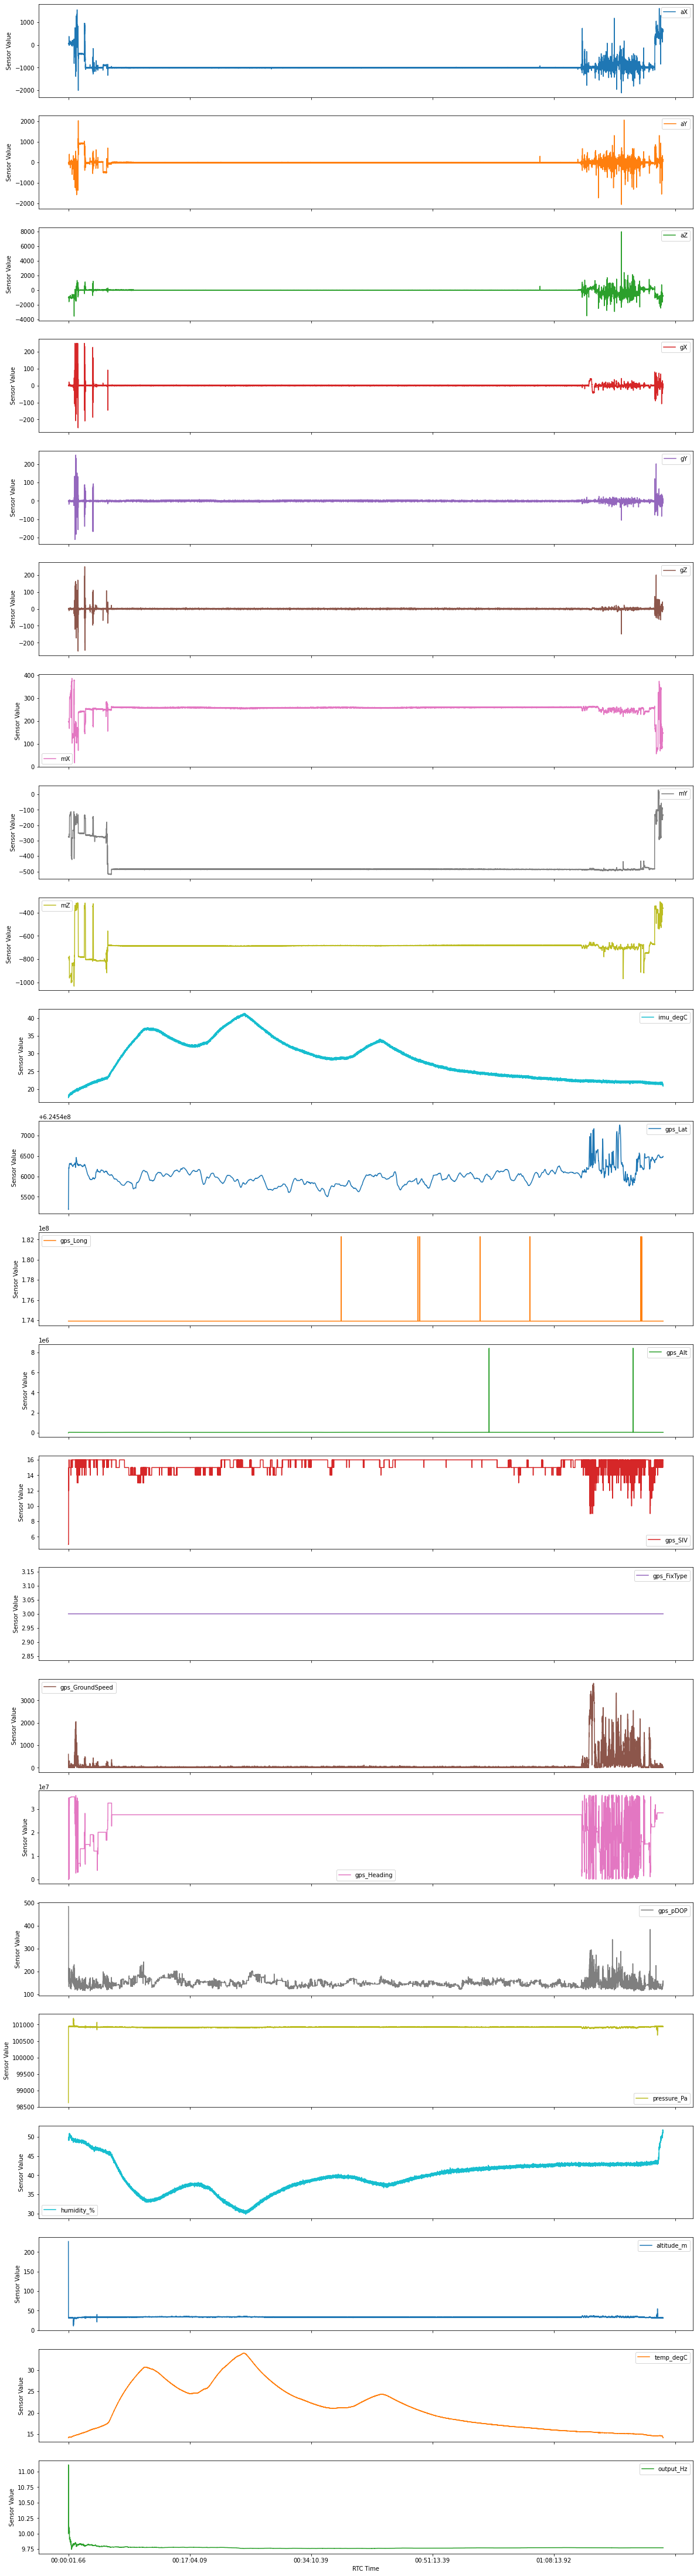

In [9]:
g = data_with_gps.plot(x='rtcTime',subplots=True, figsize=(20,80), xlabel="RTC Time", ylabel="Sensor Value")
plt.show()

## Plot NO-GPS SENSOR NODE DATA

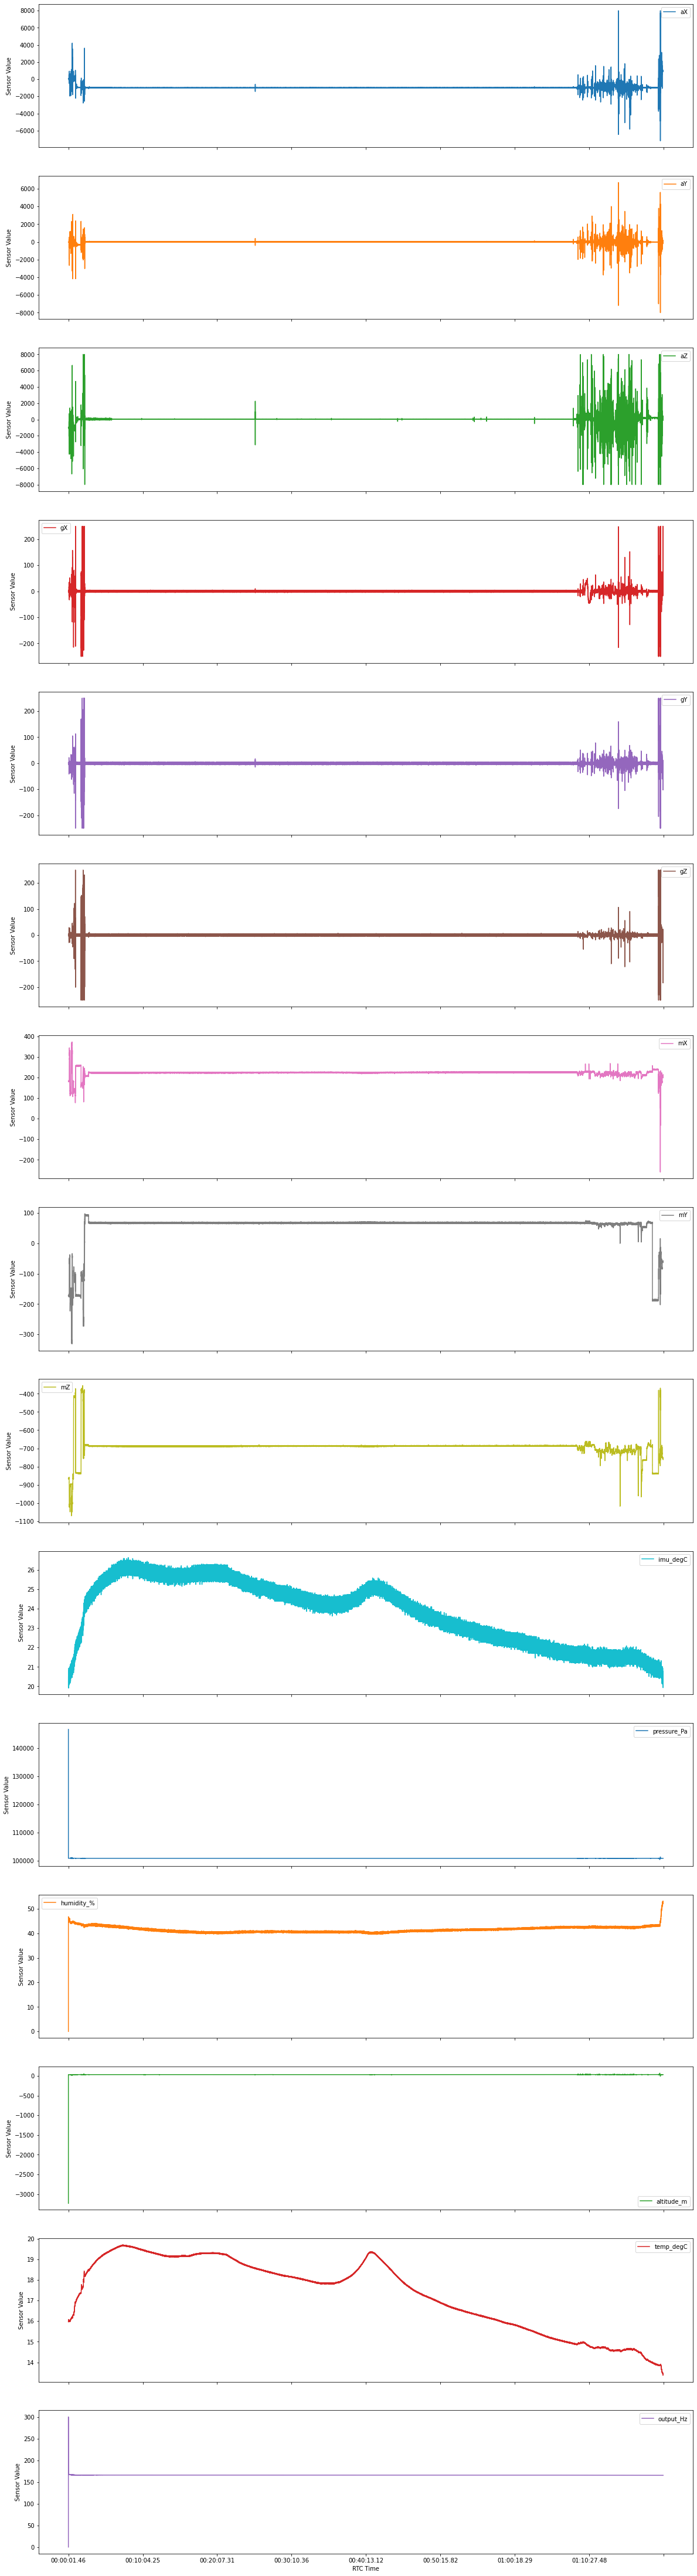

In [10]:
g = data_no_gps.plot(x='rtcTime',subplots=True, figsize=(20,80), xlabel="RTC Time", ylabel="Sensor Value")
plt.show()

## Focus on Accelerometer Data - NO GPS SENSOR NODE ~165 Hz 

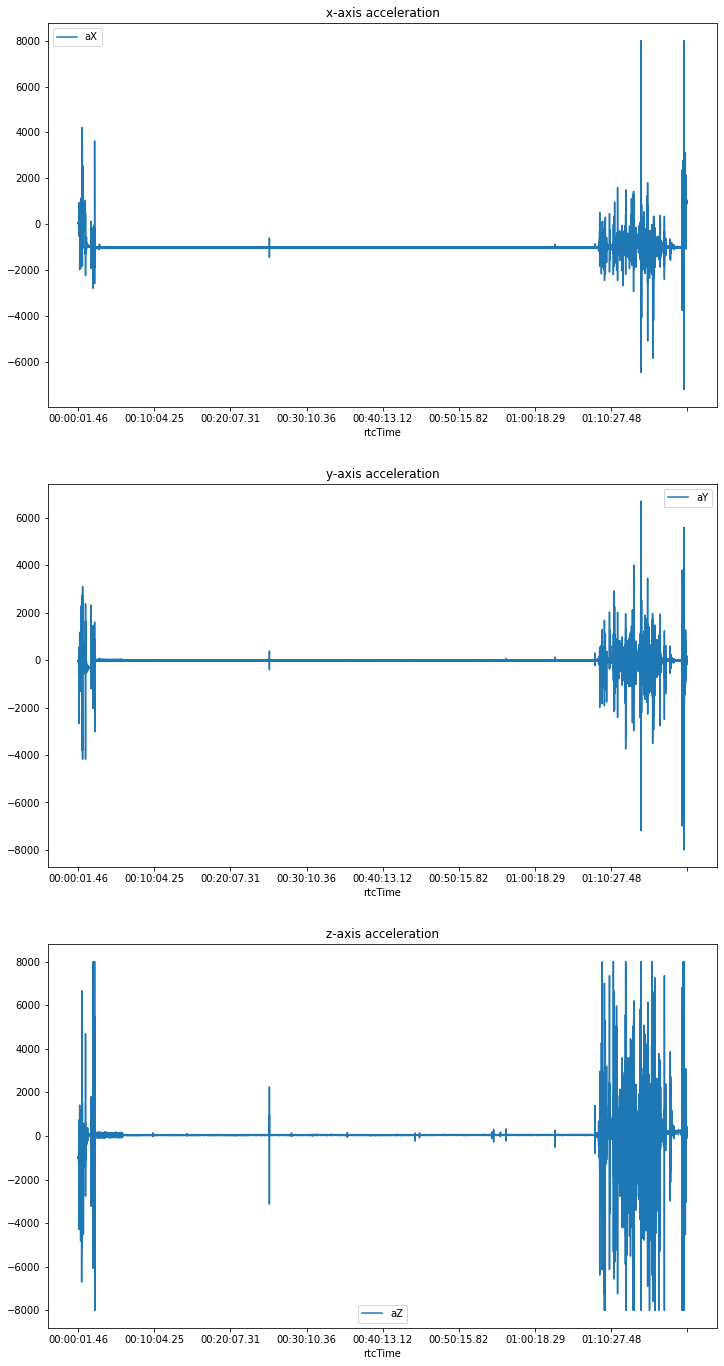

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,24))

data_no_gps.plot(x='rtcTime', y=['aX'],ax=axes[0])
axes[0].set_title("x-axis acceleration")
data_no_gps.plot(x='rtcTime', y='aY' ,ax=axes[1])
axes[1].set_title('y-axis acceleration')
data_no_gps.plot(x='rtcTime', y='aZ' ,ax=axes[2])
axes[2].set_title('z-axis acceleration');

## Focus on Accelerometer Data - WITH GPS SENSOR NODE ~10 Hz

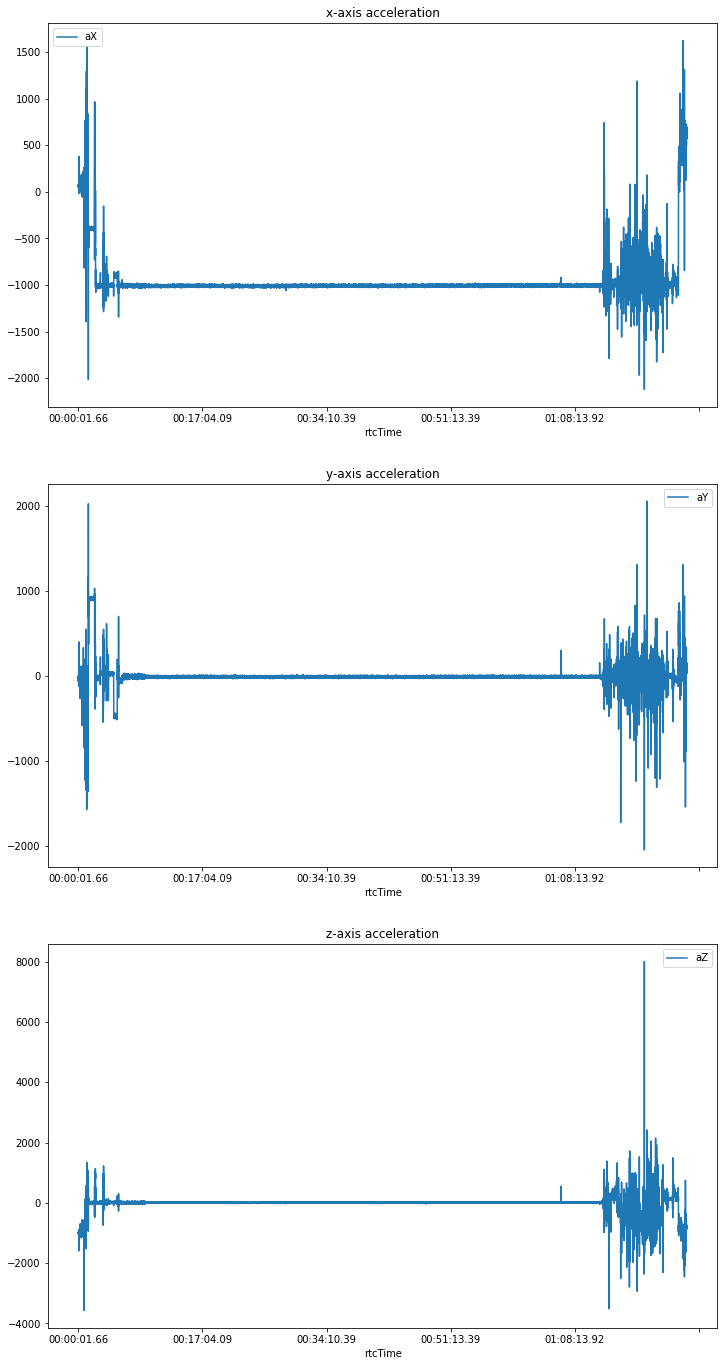

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,24))

data_with_gps.plot(x='rtcTime', y=['aX'],ax=axes[0])
axes[0].set_title("x-axis acceleration")
data_with_gps.plot(x='rtcTime', y='aY' ,ax=axes[1])
axes[1].set_title('y-axis acceleration')
data_with_gps.plot(x='rtcTime', y='aZ' ,ax=axes[2])
axes[2].set_title('z-axis acceleration');

## Focus on Active Region in Accelerometer Data

(669421.0, 799421.0)

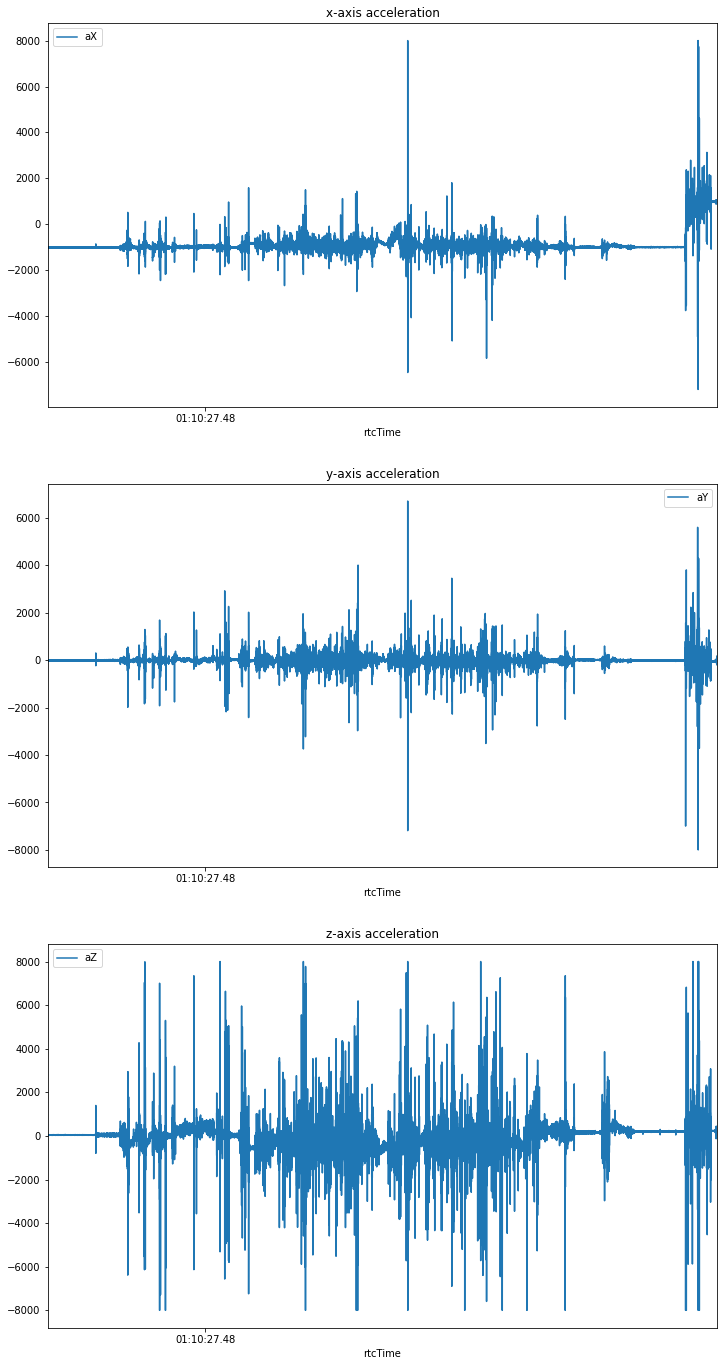

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(12,24))

data_no_gps.plot(x='rtcTime', y=['aX'],ax=axes[0])
axes[0].set_title("x-axis acceleration")
axes[0].set_xlim([len(data_no_gps['aX'])-13e4, len(data_no_gps['aX'])])
data_no_gps.plot(x='rtcTime', y='aY' ,ax=axes[1])
axes[1].set_title('y-axis acceleration')
axes[1].set_xlim([len(data_no_gps['aX'])-13e4, len(data_no_gps['aX'])])
data_no_gps.plot(x='rtcTime', y='aZ' ,ax=axes[2])
axes[2].set_title('z-axis acceleration');
axes[2].set_xlim([len(data_no_gps['aX'])-1.3e5, len(data_no_gps['aX'])])

## Show data distribution using histogram

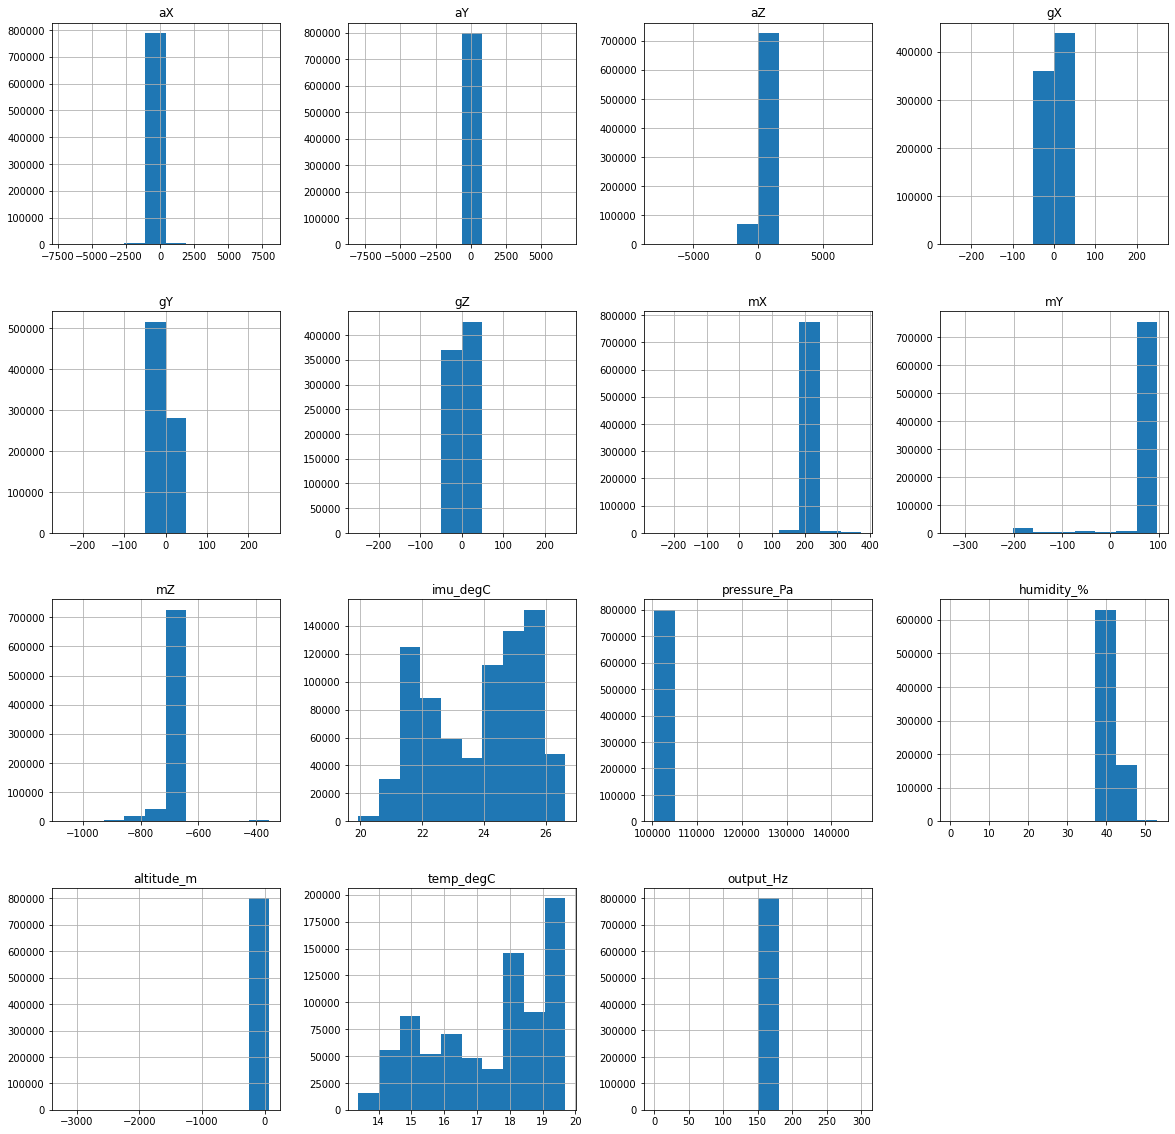

In [14]:
g=data_no_gps.hist(figsize=(20,20))

### Manually remove no movement data. Try later

In [15]:
# a = np.array(data_no_gps['aY'].values.tolist())
# print(data_no_gps['aY'].mean())
# data_no_gps['aY'] = np.where(np.absolute(a) < 10, np.nan, a).tolist()
# data_no_gps.plot(x='rtcTime', y='aY', figsize=(20,10))

## Use Z-score to remove outliers with threshold of 3. 
    Meaning that values that are 3 standard deviations away from the mean will be removed.

/tmp/ipykernel_31449/3068720796.py:15: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  removed_outliers.plot(x='rtcTime',subplots=True, figsize=(20,80),ax=ax[0]);
/tmp/ipykernel_31449/3068720796.py:16: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_no_gps.plot(x='rtcTime',subplots=True, figsize=(20,80),ax=ax[1]);


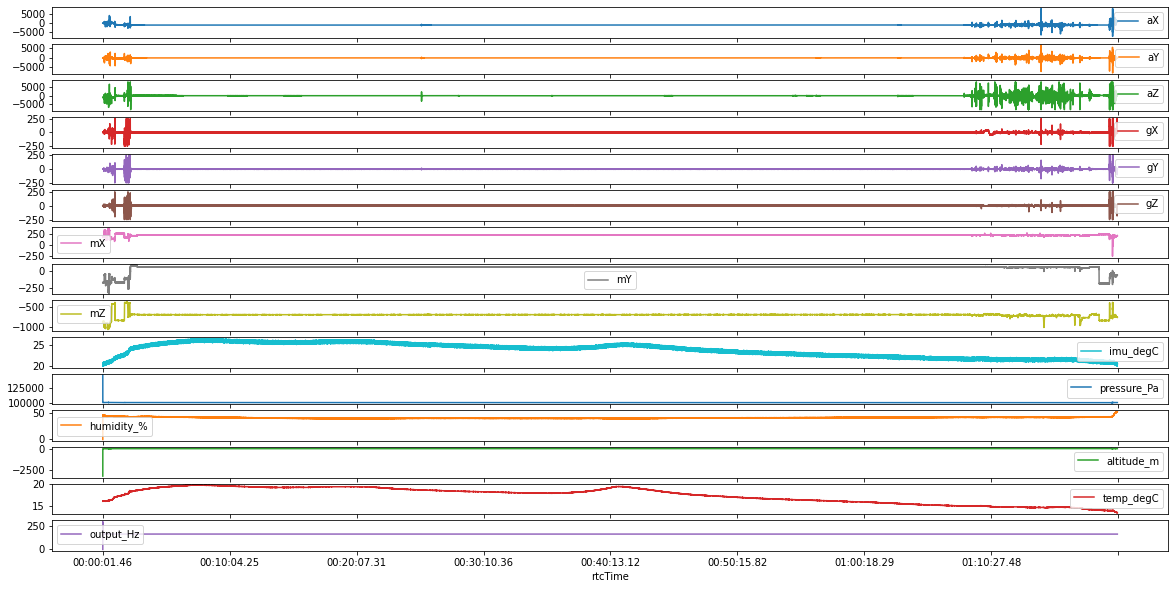

In [24]:
from scipy import stats
# removed_outliers = data_no_gps[(np.abs(stats.zscore(data_no_gps)) < 3).all(axis=1)]
removed_outliers=data_no_gps[(np.abs(stats.zscore(data_no_gps['aX'])) < 10)]
removed_outliers=removed_outliers[(np.abs(stats.zscore(removed_outliers['aY'])) < 10)]
removed_outliers=removed_outliers[(np.abs(stats.zscore(removed_outliers['aZ'])) < 10)]
removed_outliers=removed_outliers[(np.abs(stats.zscore(removed_outliers['gX'])) < 10)]
removed_outliers=removed_outliers[(np.abs(stats.zscore(removed_outliers['gY'])) < 5)]
removed_outliers=removed_outliers[(np.abs(stats.zscore(removed_outliers['gZ'])) < 5)]
removed_outliers=removed_outliers[(np.abs(stats.zscore(removed_outliers['mX'])) < 5)]
removed_outliers=removed_outliers[(np.abs(stats.zscore(removed_outliers['mY'])) < 5)]
removed_outliers=removed_outliers[(np.abs(stats.zscore(removed_outliers['mZ'])) < 5)]
removed_outliers=removed_outliers[(np.abs(stats.zscore(removed_outliers['pressure_Pa'])) < 5)]
removed_outliers=removed_outliers[(np.abs(stats.zscore(removed_outliers['altitude_m'])) < 20)]
fig, ax = plt.subplots(figsize=(40,80), nrows=1, ncols=2)
removed_outliers.plot(x='rtcTime',subplots=True, figsize=(20,80),ax=ax[0]);
data_no_gps.plot(x='rtcTime',subplots=True, figsize=(20,80),ax=ax[1]);

In [ ]:
q = data_no_gps["col"].quantile(0.99)
data_no_gps[data_no_gps["col"] < q]